(error-analysis-section)=
# Error analysis

In {prf:ref}`euler-example` in the previous section we solved the following IVP using the Euler method

$$y' = ty, \qquad t\in [0,1], \qquad y(0)=1.$$

This IVP is quite simple we can use analytical methods to determine the solution which is $y = e^{t^2/2}$. Since we have an exact solution we can calculate the absolute error between the numerical solution and the exact solution using

$$ \begin{align*}
    \text{absolute error} &= | y_\text{exact} - y_\text{numerical} |.
\end{align*} $$

The numerical solution to this IVP computed using the Euler method, the exact solution for the same $t$ values used in the Euler method and the absolute error are shown in {numref}`euler-example-exact-table` below and the numerical and exact solutions plotted in {numref}`euler-example-exact-figure`.

:::{list-table} Comparisons between the Euler method solutions and the exact solutions for the IVP $y'=ty$, $t\in[0,1]$, $y(0)=1$.
:header-rows: 1
:name: euler-example-exact-table

* - $t$
  - Euler
  - Exact
  - Error
* - 0.00  
  - 1.000000
  - 1.000000
  - 0.00e+00
* - 0.2
  - 1.000000
  - 1.020201
  - 2.02e-02
* - 0.4
  - 1.040000
  - 1.083287
  - 4.33e-02
* - 0.6
  - 1.123200
  - 1.197217
  - 7.40e-02
* - 0.8
  - 1.257984
  - 1.377128
  - 1.19e-0
* - 1.0
  - 1.459261
  - 1.648721
  - 1.89e-01
:::

:::{glue:figure} euler_example_exact_plot
:name: euler-example-exact-figure
:figwidth: 600

Comparisons between the Euler method solutions and the exact solutions for the IVP $y'=ty$, $t\in[0,1]$, $y(0)=1$.
:::

From the {numref}`euler-example-exact-table` and {numref}`euler-example-exact-figure` it is obvious that the numerical solution computed using the Euler method becomes increasingly inaccurate as $t$ increases. This is because when deriving the Euler method we truncate the {prf:ref}`Taylor series<taylor-series-definition>` so that any term after the first-order derivative is ignored. The omission of the higher-order terms means that the Taylor series is longer equal to $f(t+h)$ and we have introduced an error. It is important that we study this error and the effect that the errors have on our solutions. 

* - $t$
  - Euler
  - Exact
  - Error
* - 0.0
  - 1.000000
  - 1.000000
  - 0.00e+00
* - 0.2
  - 1.000000
  - 1.020201
  - 2.02e-02
* - 0.4
  - 1.040000
  - 1.083287
  - 4.33e-02
* - 0.6
  - 1.123200
  - 1.197217
  - 7.40e-02
* - 0.8
  - 1.257984
  - 1.377128
  - 1.19e-01
* - 1.0
  - 1.459261
  - 1.648721
  - 1.89e-01


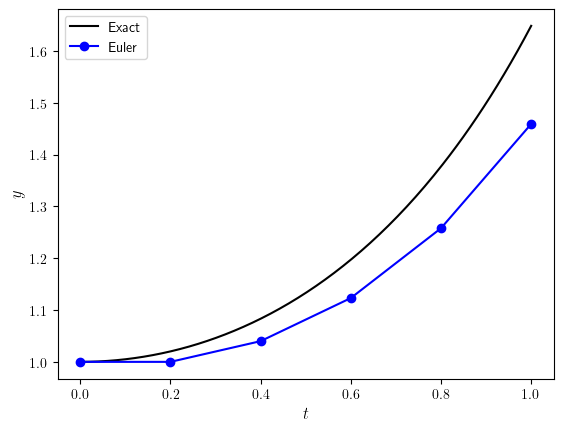

In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True

# Define the Euler method
def euler(f, tspan, y0, h): 

    # Initialise t and y arrays
    t = np.empty(100000)
    y = np.empty((100000,len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps
    n = 0
    while t[n] < tspan[1]:

        # Ensure t does not exceed tspan[1]
        h = min(h, tspan[1] - t[n])
        
        # Calculate Euler method
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h
        n += 1
        
    return t[:n+1], y[:n+1,:]


# Define ODE function and the exact solution
def f(t,y):
    return t * y

def exact(t):
    return np.exp(t ** 2 / 2)


# Define IVP parameters
tspan = [0, 1]
y0 = [1]
h = 0.2

# Solve IVP
t, y = euler(f, tspan, y0, 0.2)

# Output table
print(f"* - $t$\n  - Euler\n  - Exact\n  - Error")
for n in range(len(t)):
    print(f"* - {t[n]:0.1f}\n  - {y[n,0]:0.6f}\n  - {exact(t[n]):0.6f}\n  - {abs(exact(t[n]) - y[n,0]):0.2e}")

# Plot solutions
texact = np.linspace(tspan[0], tspan[1], 200)
yexact = exact(texact)

fig, ax = plt.subplots()
plt.plot(texact, yexact, "k", label=f"Exact")
plt.plot(t, y, "bo-", label=f"Euler")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()

from myst_nb import glue
glue("euler_example_exact_plot", fig, display=False)

## Changing the step length

Analysing the error of a numerical method is challenging since usually we do not know what the exact solution is (if we did we wouldn't need a numerical method to calculate a solution). So instead we look at the behaviour of the error as the step length changes. Recall the [Euler method](euler-method-section) which is 

$$y_{n+1} = y_n + h f(t_n, y_n).$$

The solution over a single time step is changed from the current solution $y_n$ by $h$ multiplied by the value of $f(t_n, y_n)$. If we assume that that value of $y_n$ has some error associated to it then the error will also be changed by $h$ multiplied by some value. Therefore, the smaller the value of $h$ then the smaller the change in the error converging to zero when $h$ is infinitesimally small.

We can demonstrate this by looking at the solutions to the initial value problem from {prf:ref}`euler-example` using different values of the step length $h$. The numerical solutions using $h=0.2, 0.1, 0.05, 0.005$ have been plotted against the exact solution in {numref}`euler-example-hvals-figure`. 

:::{glue:figure} euler_example_hvals_plot
:name: euler-example-hvals-figure
:figwidth: 600

Solutions to the IVP $y'=ty$, $t \in [0,1]$, $y(0)=1$ using the Euler method with step lengths $h=0.2, 0.1, 0.05, 0.005$.
:::

Here we can see that as the step length is reduced, the solution gets closer to the exact solution as expected. The absolute errors between the exact solution $y(1) = e^{1/2} = 1.648721\ldots$ calculated using the different step lengths are tabulated in {numref}`euler-example-hvals-table`.

:::{list-table} Global truncation errors for Euler method uses different step lengths.
:header-rows: 1
:name: euler-example-hvals-table

* - $h$
  - Euler
  - Error
* - 0.2
  - 1.459261
  - 1.89e-01
* - 0.1
  - 1.547110
  - 1.02e-01
* - 0.05 
  - 1.595942
  - 5.28e-02
* - 0.025
  - 1.621801
  - 2.69e-02
:::

The third columns shows that as the step length is halved, the error decreases by a factor of approximately one half. This behaviour can be seen in {numref}`euler-example-errors-figure` where the absolute errors between the numerical solutions for $y(1)$ and the exact solution is plotted against the step length. 

:::{glue:figure} euler_example_errors_plot
:name: euler-example-errors-figure
:figwidth: 600

Solutions to the IVP $y'=ty$ using step lengths $h=0.2, 0.1, 0.05, 0.005$.
:::


* - $t$
  - Euler
  - Exact
  - Error
* - 0.200
  - 1.459261
  - 1.89e-01
* - 0.100
  - 1.547110
  - 1.02e-01
* - 0.050
  - 1.595942
  - 5.28e-02
* - 0.025
  - 1.621801
  - 2.69e-02


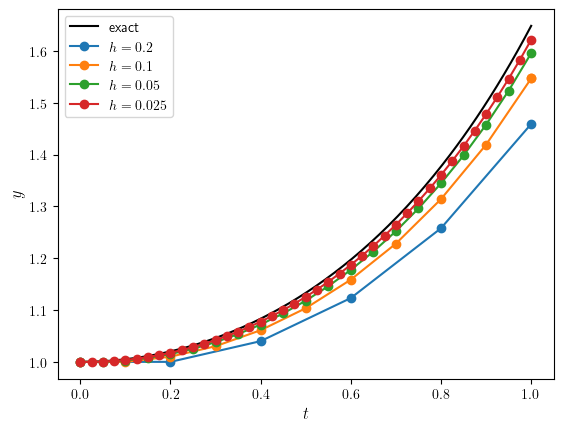

In [37]:
# Define IVP parameters
tspan = [0, 1]
y0 = [1]
hvals = [ 0.2, 0.1, 0.05, 0.025 ]  # step length values

# Loop through h values and calculate solution
tsols, ysols = [], []
for h in hvals:
    t, y = euler(f, tspan, y0, h)
    tsols.append(t)
    ysols.append(y)

# Plot solutions
fig, ax = plt.subplots()
plt.plot(texact, yexact, "k", label=f"exact")
for i in range(len(hvals)):
    plt.plot(tsols[i], ysols[i], "o-", label=f"$h = {hvals[i]}$")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
glue("euler_example_hvals_plot", fig, display=False)

# Output table
print(f"* - $t$\n  - Euler\n  - Exact\n  - Error")
for i in range(len(hvals)):
    print(f"* - {hvals[i]:0.3f}\n  - {ysols[i][-1,0]:0.6f}\n  - {abs(exact(tsols[i][-1]) - ysols[i][-1,0]):0.2e}")

(big-o-notation-section)=
## Big-O notation

To compare the accuracy of different numerical methods we use <a href="https://en.wikipedia.org/wiki/Big_O_notation" target="_blank">big-O notation</a> which describes the rate at which a function tends to zero.

::::{prf:definition} Big-O notation
:label: big-o-notation-definition

Let $f(h) = O(h^n)$ then 

$$\lim_{h \to 0} f(h) = Ch^n$$

for some positive constant $C$.
::::

If a function $f(h)$ is $f(h) = O(h^n)$ then we say that *"f of h is big O of h to the power n"* which means $f(h)$ tends to zero at least as fast as $h^n$. For example, if $f(h) = O(h)$ then if we halve $h$ then we would expect $f(h)$ to also be halved (known as *linear convergence*), however if $f(h) = O(h^2)$ then if we halve $h$ then the value of $f(h)$ would decrease by a factor of $\frac{1}{4}$ since $(\frac{1}{2})^2 = \frac{1}{4}$ (known as *quadratic convergence*). So the higher the power of $h$ the faster the function $f(h)$ converges to zero as $h$ decreases. 

Since the error of a numerical method is dependent upon the step length $h$ then we can say that it behaves like a polynomial function and we can approximate the error using $f(h) = O(h^n)$.

:::{prf:definition} Order of a method
:label: order-definition

If the error of a numerical method is $O(h^n)$ then the method is said to be of order $n$.
:::

:::{note} 
The higher the order of a method, the more accurate the solution will be when using the same step length $h$. 
:::

(local-truncation-error-section)=
## Local truncation error

::::{prf:definition} Local Truncation Error
:label: lte-definition

The Local Truncation Error (LTE), $\tau_n$, is the error in the calculation of a single step of a numerical method assuming that the previous values used are exact.
::::

Writing the {prf:ref}`Taylor series<taylor-series-definition>` expansion for $y(t)$ and if $y'(t) = f(t, y)$ then 

$$y(t + h) = y(t) + hf(t, y) + \frac{h^2}{2!}f'(t, y) + \cdots $$

When deriving the Euler method we truncated the Taylor series to first-order so

$$y_{n+1} = y_n + h f(t_n, y_n) + \tau_n,$$

where the local truncation error is

$$ \tau_n = \frac{h^2}{2!}f'(t_n, y_n) + \frac{h^3}{3!}f''(t_n, y_n) + \cdots $$

The value of the first term in $\tau_n$ is much larger than that of all of the other terms so we can say that for the Euler method $\tau_n = O(h^2)$. 

(global-truncation-error-section)=
## Global truncation error

::::{prf:definition} Global Truncation Error
:label: gte-definition

The Global Truncation Error (GTE), $E_n$, is the error that has accumulated over all previous steps of a numerical method assuming the initial solution was known to be exact. 
::::

Let $\tilde{y}_n$ denote a numerical solution and $y_n$ denote the exact solution for $y(t_n)$ then the global truncation error is calculated using

$$ \begin{align*}
    E_n = |y_n - \tilde{y}_n |,
\end{align*} $$

This is represented graphically in {numref}`gte-figure`.

:::{glue:figure} gte_fig
:name: gte-figure
:figwidth: 600

The global truncation error, $E_n$, is the difference between the exact solution, $y_n$, and the numerical solution, $\tilde{y}_n$.
:::

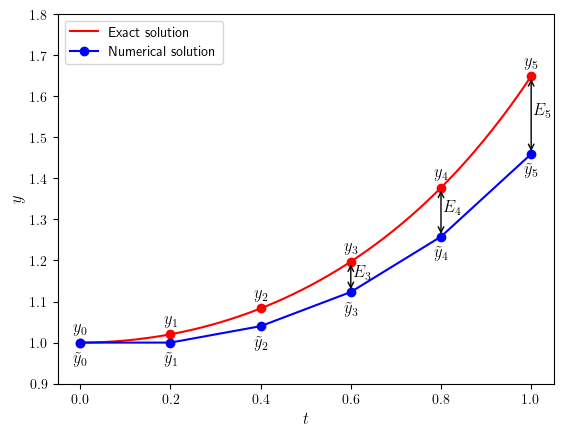

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True

f = lambda t, y: t * y
exact = lambda t: np.exp(t ** 2 / 2)

# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length

# Calculate the solution to the IVP
t, y = euler(f, tspan, y0, h)
    
# Plot solution
t1 = np.linspace(tspan[0], tspan[1], 200)
y1 = exact(t1)
fig, ax = plt.subplots()
plt.plot(t1, y1, "r-", label="Exact solution")
plt.plot(t, exact(t), "ro")
plt.plot(t, y, "bo-", label="Numerical solution")
for i in range(len(t)):
    plt.text(t[i], y[i,0] - 0.05, rf"$\tilde{{y}}_{i}$", fontsize=12, ha="center")
    plt.text(t[i], exact(t[i])+0.025, f"$y_{i}$", fontsize=12, ha="center")
    if i > 2:
        plt.text(t[i]+0.005, y[i,0]/2 + exact(t[i])/2, f"$E_{i}$", fontsize=12)
        plt.annotate("", xy=(t[i],y[i]), xytext=(t[i],exact(t[i])), arrowprops=dict(arrowstyle="<->"))

plt.ylim([0.9, 1.8])
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend(loc="upper left")
plt.show()


from myst_nb import glue
glue("gte_fig", fig, display=False)

## Accuracy of the Euler method

We can use the global and local truncations errors to analyse the accuracy of the Euler method. Comparing the exact, $\tilde{y}$, and numerical solutions, $y$, which are

$$ \begin{align*}
    y_{n+1} &= y_{n} + hf(t_n, y_n), \\
    \tilde{y}_{n+1} &= \tilde{y}_n + hf(t_n, \tilde{y}_n) + \tau_{n}
\end{align*} $$

and subtracting the first equation from the second gives

$$ \begin{align*}
    y_{n+1} - \tilde{y}_{n+1} &= y_n - \tilde{y}_n + h(f(t_n, y_n) - f(t_n, \tilde{y}_n)) + \tau_{n} \\
    E_{n+1} &= E_n + h(f(t_n, y_n) - f(t_n, \tilde{y}_n)) + \tau_{n} 
\end{align*} $$

Assuming that $f(t,y)$ satisfies the <a href="https://en.wikipedia.org/wiki/Lipschitz_continuity" target="_blank">Lipschitz condition</a> which is

$$ \begin{align*}
    |f(t_n, y_n) - f(t_{n+1}, y_{n+1})| \leq L|y_n - y_{n+1}|,
\end{align*} $$

where $L$ is the Lipschitz constant, then it can be shown that $E_n$ satisfies

$$ \begin{align*}
    |E_n| \leq \frac{\displaystyle\max_i (\tau_i)}{h} \left(\frac{\exp(L(t_n - t_0)) - 1}{L}\right), \qquad i = 0, \ldots, n.
\end{align*} $$

The term in the brackets is just some constant, $C$ say, and since for the Euler method $\tau = O(h^2)$ then

$$\begin{align*}
    E_n \leq C\frac{O(h^2)}{h} = O(h).
\end{align*}  $$

So this means the global truncation error for the Euler method is $O(h)$ which confirms that it is a first order method. We saw in {numref}`euler-example-errors-figure` that as $h$ decreases the global truncation error decreased in a linear fashion where gradient of the line was approximately 1 confirming that the Euler method is a first-order method.

## Code

The code used to produce {numref}`euler-example-hvals-table` and {numref}`euler-example-errors-figure` is shown below. This assumes the function [`solveIVP()`](euler-code-section) and [`euler()`](euler-code-section) have already been defined.

:::::{tab-set}
::::{tab-item} Python
```python
# Define ODE function and the exact solution
def f(t,y):
    return t * y


def exact(t):
    return np.exp(t ** 2 / 2)


# Define IVP parameters
tspan = [0, 1]
y0 = [1]
hvals = [ 0.2, 0.1, 0.05, 0.025 ]  # step length values

# Loop through h values and calculate errors
errors = []
print(f"Exact solution: y(1) = {exact(1):0.6f}\n")
print("|   h   |  Euler   |  Error   |")
print("|:-----:|:--------:|:--------:|")
for h in hvals:
    t, y = solveIVP(f, tspan, y0, h, euler)
    errors.append(abs(y[-1,0] - exact(t[-1])))
    print(f"| {h:0.3f} | {y[-1,0]:0.6f} | {errors[-1]:0.2e} |")

# Plot errors
fig, ax = plt.subplots()
plt.plot(hvals, errors, "bo-")
plt.xlabel("$h$", fontsize=12)
plt.ylabel("$E(h)$", fontsize=12)
plt.show()
```
::::

::::{tab-item} MATLAB
```matlab
% Define ODE function and the exact solution
f = @(t, y) t * y;
exact = @(t) exp(t .^ 2 / 2);

% Define IVP parameters
tspan = [0, 1];
y0 = [1];
hvals = [0.2, 0.1, 0.05, 0.025];    % step length values

% Loop through h values and calculate solution
errors = [];
for i = 1 : 1 % use for loop to group print statements
    fprintf("Exact solution: y(1) = %1.6f", exact(1))
    fprintf(" ")
    fprintf("|   h   |  Euler   |  Error   |")
    fprintf("|:-----:|:--------:|:--------:|")
    for h = hvals
        [t, y] = solveIVP(f, tspan, y0, h, @euler);
        errors = [errors, abs(y(end) - exact(t(end)))];
        fprintf("| %1.3f | %1.6f | %1.2e |\n", h, y(end), errors(end))
    end
end
% Plot errors
plot(hvals, errors, 'b-o', LineWidth=2, MarkerFaceColor='b')
axis padded
xlabel('$h$', FontSize=14, Interpreter='latex')
ylabel('$E(h)$', FontSize=14, Interpreter='latex')
```
::::
:::::

Exact solution: y(1) = 1.648721

|   h   |  Euler   |  Error   |
|:-----:|:--------:|:--------:|
| 0.200 | 1.459261 | 1.89e-01 |
| 0.100 | 1.547110 | 1.02e-01 |
| 0.050 | 1.595942 | 5.28e-02 |
| 0.025 | 1.621801 | 2.69e-02 |


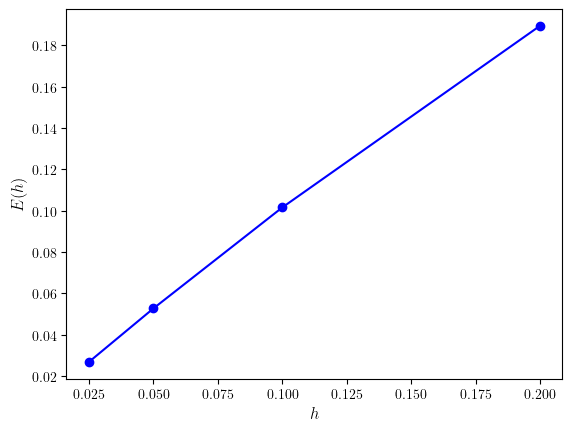

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels

# Euler method function
def euler(f, t, y, h): 
    return y + h * f(t, y)


# IVP solver function
def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


# Define ODE function and the exact solution
def f(t,y):
    return t * y


def exact(t):
    return np.exp(t ** 2 / 2)


# Define IVP parameters
tspan = [0, 1]
y0 = [1]
hvals = [ 0.2, 0.1, 0.05, 0.025 ]  # step length values

# Loop through h values and calculate errors
errors = []
print(f"Exact solution: y(1) = {exact(1):0.6f}\n")
print("|   h   |  Euler   |  Error   |")
print("|:-----:|:--------:|:--------:|")
for h in hvals:
    t, y = solveIVP(f, tspan, y0, h, euler)
    errors.append(abs(y[-1,0] - exact(t[-1])))
    print(f"| {h:0.3f} | {y[-1,0]:0.6f} | {errors[-1]:0.2e} |")

# Plot errors
fig, ax = plt.subplots()
plt.plot(hvals, errors, "bo-")
plt.xlabel("$h$", fontsize=12)
plt.ylabel("$E(h)$", fontsize=12)
plt.show()

from myst_nb import glue
glue("euler_example_errors_plot", fig, display=False)